# Sampling with and without replacement, Empirical distribution function, Probability density function, Normal distribution, Probability, Simulation, Boostraping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats

In [2]:
data = pd.DataFrame()
data['poids'] = [47, 48, 85, 20, 19, 13, 72, 16, 50, 60]
data

,poids
0,47
1,48
2,85
3,20
4,19
5,13
6,72
7,16
8,50
9,60


# Sample with and without replacement

In [3]:
# Sample with replacement, size 5
sample_with_replacement = data['poids'].sample(n = 5, replace = True)
sample_with_replacement 

5    13
7    16
0    47
4    19
1    48
Name: poids, dtype: int64

In [4]:
# Sample without replacement, size 5
sample_without_replacement = data['poids'].sample(n = 5, replace = False)
sample_without_replacement

6    72
7    16
2    85
9    60
4    19
Name: poids, dtype: int64

In [5]:
# Parameters of the population
data.describe()

,poids
count,10.000000
mean,43.000000
std,25.205819
min,13.000000
25%,19.250000
50%,47.500000
75%,57.500000
max,85.000000


In [6]:
# Parameters of the sample with replacement
sample_with_replacement.describe()

count     5.000000
mean     28.600000
std      17.386777
min      13.000000
25%      16.000000
50%      19.000000
75%      47.000000
max      48.000000
Name: poids, dtype: float64

In [7]:
# Parameters of the sample without replacement
sample_without_replacement.describe()

count     5.000000
mean     50.400000
std      31.325708
min      16.000000
25%      19.000000
50%      60.000000
75%      72.000000
max      85.000000
Name: poids, dtype: float64

# Empirical distribution function

In [8]:
# Load the IRIS data from seaborn library
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# Species of IRIS
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [10]:
# Petal IRIS versicolor lengths (petal_length)
iris[iris['species'] == 'versicolor']['petal_length'].head(10)

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
Name: petal_length, dtype: float64

In [11]:
# Function for calculating the empirical distribution of a variable

def edf(data):
    # size of the data
    size = len(data)
    
    # sort the values in the array
    x = np.sort(data)
    
    # calcul the probability 1/n
    y = np.arange(1, size + 1) / size
    
    return (x, y)

In [12]:
# Empirical distribution of the Length of petals of each species of iris

x_vers, y_vers = edf(iris[iris['species'] == 'versicolor']['petal_length'])
x_set, y_set = edf(iris[iris['species'] == 'setosa']['petal_length'])
x_virg, y_virg = edf(iris[iris['species'] == 'virginica']['petal_length'])

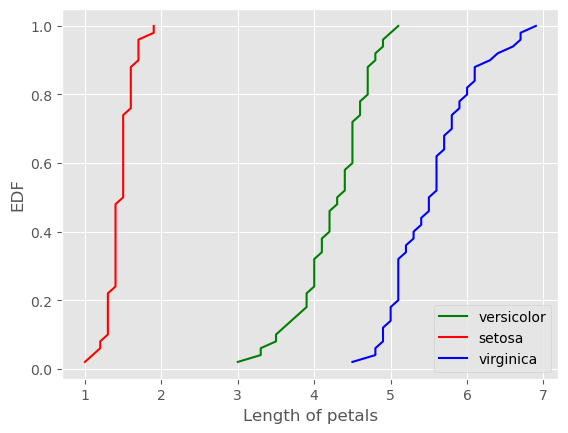

In [13]:
plt.plot(x_vers, y_vers, color = 'green')
plt.plot(x_set, y_set, color = 'red')
plt.plot(x_virg, y_virg, color = 'blue')
plt.legend(('versicolor', 'setosa', 'virginica'))
plt.xlabel('Length of petals')
plt.ylabel('EDF')
plt.show()

# Probability density function

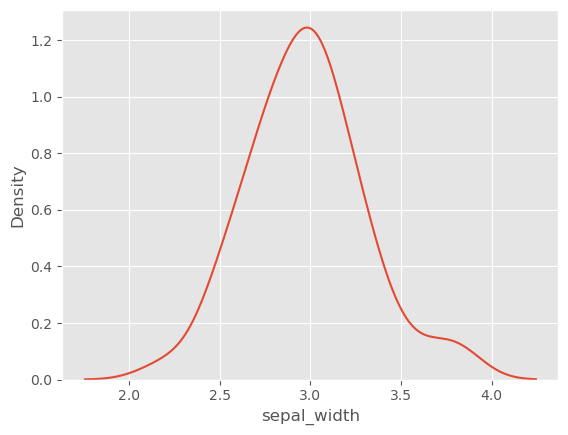

In [14]:
# Probability density of iris virginica sepal width
sns.distplot(iris[iris['species'] == 'virginica']['sepal_width'], hist = False);

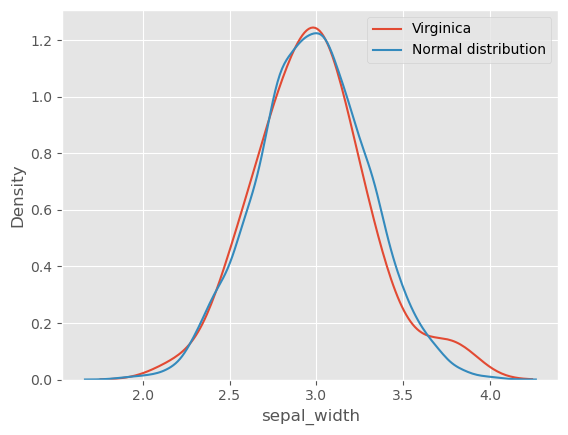

In [15]:
# Does the width of iris virginica sepals follow a normal distribution?
# To answer we will use the probability density function

# Example or normal distribution
mn = iris[iris['species'] == 'virginica']['sepal_width'].mean()
st = iris[iris['species'] == 'virginica']['sepal_width'].std()
normal_dist = np.random.normal(mn, st, size = 10000)

# comparison of the two distribution
sns.distplot(iris[iris['species'] == 'virginica']['sepal_width'], hist = False, label = 'Virginica');
sns.distplot(normal_dist, hist = False, label = 'Normal distribution');

plt.legend()
plt.show()

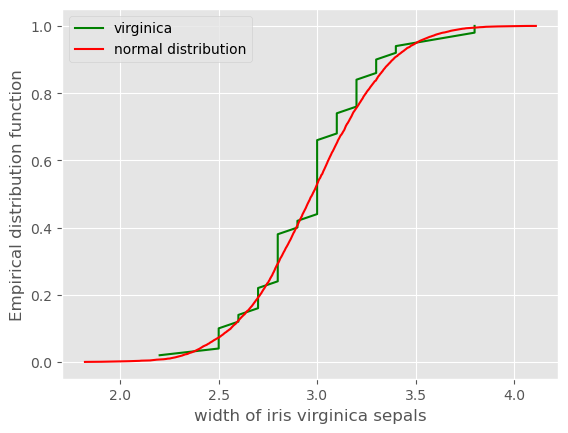

In [16]:
# Does the width of iris virginica sepals follow a normal distribution?
# To answer we will use the Empirical distribution function

x, y = edf(iris[iris['species'] == 'virginica']['sepal_width'])
x_norm, y_norm = edf(normal_dist)

plt.plot(x, y, color = 'green')
plt.plot(x_norm, y_norm, color = 'red')
plt.legend(('virginica', 'normal distribution'))
plt.xlabel('width of iris virginica sepals')
plt.ylabel('Empirical distribution function')
plt.show()

# Probability

In [17]:
# Probability that the width of the sepals of an Iris virginica is > 3.5 cm

prob = np.sum(normal_dist > 3.5) / len(normal_dist)
prob * 100

5.17

# Using simulations for probability estimation

In [18]:
# to generate 5 random numbers between 0 and 1
res = np.random.random(size = 5)

# check the numbers of "heads" from this one experiment
tail = np.sum(res < 0.5)

# probability for this one experiment
prob = 0;

if (tail == 5):
    prob = 1

print("Result of the experiment: ", res, '\nNumber of head obtained : ', tail, '\nProbalility : ', prob)

Result of the experiment:  [0.36096191 0.94540347 0.99261953 0.25123876 0.90347555] 
Number of head obtained :  2 
Probalility :  0


In [19]:
# Simulation of N expérience E

# N = number of experiment

def simulation(N):
    count = 0;
    
    for i in range(N):
        # random numbers
        res = np.random.random(size = 5)
        # count the number of 'tail' obtained
        nb = np.sum(res < 0.5)
        
        if (nb == 5):
            count = count + 1
    
    # calcul of probability
    prob = (count / N) * 100
    
    return(prob)
    
print("the probability of getting 5 tails out of the 5 tosses is:", simulation(1000000), "%")

the probability of getting 5 tails out of the 5 tosses is: 3.1263 %


In [20]:
def test(N):
    count = 0;

    dice = [1, 2, 3, 4, 5, 6]
    
    for i in range(N):
        # make two random choices from the given data
        res = np.random.choice(dice, size = 2)
    
        # check if the two choices are the same
        if (res[0] == res[1]):
            count = count + 1;
    
        # calcul of probability
        prob = (count / N) * 100
    
    return(prob)

print("the probability of winning the game is :", test(1000000), "%") 

the probability of winning the game is : 16.7189 %


# Boostraping: a resampling method

In [21]:
# Load the data
df = pd.read_csv(r"annual_rainfall_dallas.csv", index_col = 'Year')
df.head()

,Total
Year,
2019,34.52
2018,55.97
2017,36.62
2016,35.48
2015,62.61


In [22]:
# Sort 'year' values
df = df.sort_values('Year')
df.head()

,Total
Year,
1899,18.11
1900,36.89
1901,19.65
1902,29.31
1903,27.14


# Creating and viewing bootstrap samples

In [23]:
# Boostrap sample
sampl = np.random.choice(df['Total'], size = len(df), replace = True)
sampl

array([50.62, 29.75, 29.4 , 44.1 , 35.39, 39.95, 18.11, 44.42, 17.91,
       29.73, 50.05, 27.1 , 18.97, 31.17, 24.23, 26.35, 44.6 , 53.54,
       38.14, 30.75, 34.14, 34.14, 19.55, 34.49, 45.74, 24.97, 44.58,
       35.69, 44.1 , 34.31, 29.31, 62.61, 38.48, 44.58, 35.41, 35.69,
       44.6 , 37.84, 27.19, 26.44, 34.14, 22.69, 37.84, 27.3 , 44.58,
       50.62, 62.61, 27.19, 29.62, 31.17, 23.59, 37.84, 45.27, 29.1 ,
       23.22, 23.22, 25.16, 24.37, 44.6 , 23.37, 19.55, 50.49, 24.74,
       28.15, 23.22, 25.88, 44.58, 27.1 , 34.31, 20.11, 35.69, 31.46,
       30.7 , 38.48, 23.87, 43.27, 35.63, 36.26, 32.3 , 32.83, 29.75,
       44.6 , 31.26, 27.03, 32.45, 34.22, 35.69, 34.24, 40.75, 41.43,
       21.09, 29.8 , 27.3 , 26.44, 31.7 , 38.48, 27.19, 37.7 , 27.19,
       23.22, 41.43, 45.39, 26.35, 62.61, 34.52, 35.95, 18.97, 29.1 ,
       34.22, 36.36, 27.19, 24.74, 26.81, 40.89, 21.09, 31.7 , 44.42,
       36.62, 36.36, 35.95, 34.47])

In [24]:
# Mean of the boostrap sample

sampl.mean()

33.80933884297521

In [25]:
# Standard deviation of the boostrap sample

sampl.std()

9.351129311349627

In [26]:
# Function for calculating the empirical distribution of a variable

def edf(data):
    # size of the data
    size = len(data)
    
    # sort the values in the array
    x = np.sort(data)
    
    # calcul the probability 1/n
    y = np.arange(1, size + 1) / size
    
    return (x, y)

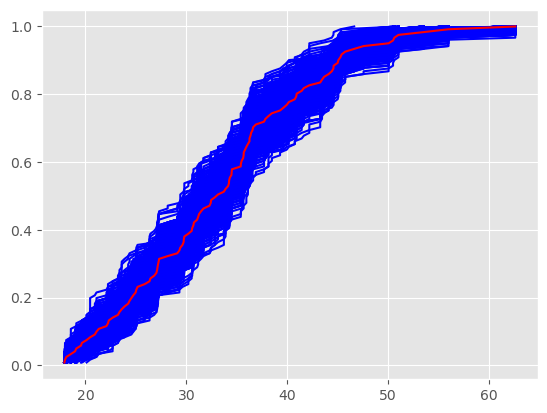

In [27]:
# Generate a thousand bootstrap samples of the same size as df
stock = []

for _ in range(1000):
    samp = np.random.choice(df['Total'], size = len(df))
    stock.append(np.mean(samp))
    
    x_boot, y_boot = edf(samp)
    _ = plt.plot(x_boot, y_boot, color = 'blue')

x, y = edf(df['Total'])
plt.plot(x, y, color = 'red')